# Viosk

In [12]:
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import scipy.io as io
from tqdm import tqdm
from PIL import Image, ImageOps
from numpy import asarray
from datetime import date
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Dataset
https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [3]:
JYLee_path = './gdrive/My Drive/2020/Viosk'
print(path.isdir(JYLee_path))

True


In [4]:
meta_data = io.loadmat(JYLee_path + '/dataset/wiki/wiki.mat')
print(meta_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016', '__version__': '1.0', '__globals__': [], 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U

#### Analysis

##### Image

In [7]:
total_length = len(meta_data['wiki']['dob'][0][0][0])
print(total_length)

total_length = 100

62328


100%|██████████| 2/2 [00:00<00:00, 114.28it/s]

[[0.77254902 0.77647059 0.74901961 ... 0.8        0.82745098 0.83137255]
 [0.74509804 0.77647059 0.76078431 ... 0.81960784 0.83529412 0.82745098]
 [0.79215686 0.77647059 0.75686275 ... 0.81960784 0.82745098 0.82745098]
 ...
 [0.50980392 0.51764706 0.5372549  ... 0.38823529 0.38431373 0.36470588]
 [0.52941176 0.5372549  0.5372549  ... 0.36470588 0.35294118 0.35686275]
 [0.54509804 0.56078431 0.59607843 ... 0.3254902  0.30980392 0.2627451 ]]
(256, 256)
Min: 0.016, Max: 0.980


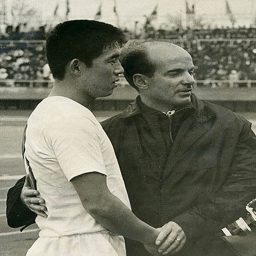

<class 'PIL.Image.Image'>
L
(256, 256)


In [10]:
data_all = []
for idx in tqdm( range( 2 )) :
  image = Image.open( JYLee_path + '/dataset/wiki/' + meta_data['wiki']['full_path'][0][0][0][idx][0] )
  resize_image = image.resize((256, 256))
  scale_image = ImageOps.grayscale(resize_image)

  data = asarray(scale_image)
  scale_data = data / 255
  data_all.append(scale_data)
data_all = np.array(data_all)

## Check
print(scale_data)
print(scale_data.shape)
print('Min: %.3f, Max: %.3f' % (scale_data.min(), scale_data.max()))
display(resize_image)
image = Image.fromarray(data)
print(type(image))
print(image.mode)
print(image.size)

##### Label

In [13]:
class_all = []
for idx in tqdm(range( 2 )) : 
  photo_taken = date.toordinal(date(meta_data['wiki']['photo_taken'][0][0][0][idx], 7, 1))
  age = photo_taken - meta_data['wiki']['dob'][0][0][0][idx]
  age = age/365

  if(age <= 10) :
    clss = 0
  elif(age <= 30) :
    clss = 1
  elif(age <= 55) :
    clss = 2
  else:
    clss = 3
  class_all.append([clss])

class_all_arr = np.array(class_all)
print(class_all_arr)

100%|██████████| 2/2 [00:00<00:00, 4339.68it/s]

[[1]
 [2]]


### Face Detection

### Crop

## Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os

print(tf.__version__)

2.4.0


### Training

### Evaluation

### Lightweight